# ClimateWins Project

## Content
### 1. Importing libraries and data
### 2. Applying Random Forest Classifier for selected weather stations

## 1. Importing libraries and data

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [6]:
# Create a path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/02 Data/"

In [7]:
# Import weather data, cleaned file
df=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_cleaned.csv'))

In [8]:
df.head(1)

,Unnamed: 0,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [9]:
# Remove irrelevant column
df=df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(22950, 135)

In [11]:
df.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9


In [12]:
# Import Pleasant weather data, cleaned file
df_ans=pd.read_csv(os.path.join(path, 'Prepared Data', 'weather_answers_cleaned.csv'))

In [13]:
df_ans.head(1)

,Unnamed: 0,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Remove irrelevant column
df_ans=df_ans.drop(columns=['Unnamed: 0'])

In [15]:
df_ans.shape

(22950, 15)

In [16]:
df_ans.head(1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Applying Random Forest Classifier for selected weather stations

### 2.1. Applying Random Forest Classifier for BASEL data

#### Creating a subset

In [20]:
# Create a pattern 
pattern_basel=r'(BASEL)'

# Filter the columns
columns_basel=df.filter(regex=pattern_basel).columns

In [21]:
columns_basel.shape

(9,)

In [22]:
columns_basel

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [23]:
df_1=df[columns_basel]

In [24]:
df_1.shape

(22950, 9)

In [25]:
df_1.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9


In [26]:
df_ans_1=df_ans[['BASEL_pleasant_weather']]

In [27]:
df_ans_1.shape

(22950, 1)

In [28]:
df_ans_1.head(1)

,BASEL_pleasant_weather
0,0


#### Splitting data

In [30]:
# Create an 'X' matrix
X_1 = df_1.to_numpy()
y_1 = df_ans_1.max(axis=1)

In [31]:
print(X_1.shape)
print(y_1.shape)

(22950, 9)
(22950,)


In [32]:
#Split data into training and testing sets.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.2)

In [33]:
print(X_train_1.shape, y_train_1.shape)
print(X_test_1.shape, y_test_1.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


#### Applying Random Forest Classifier 

In [35]:
# Create a RF classifier
clf_1 = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [36]:
# performing predictions on the test dataset
y_pred_1 = clf_1.predict(X_test_1)
  
# using metrics module for accuracy calculation
print("Model Accuracy BASEL: ", metrics.accuracy_score(y_test_1, y_pred_1))

Model Accuracy BASEL:  1.0


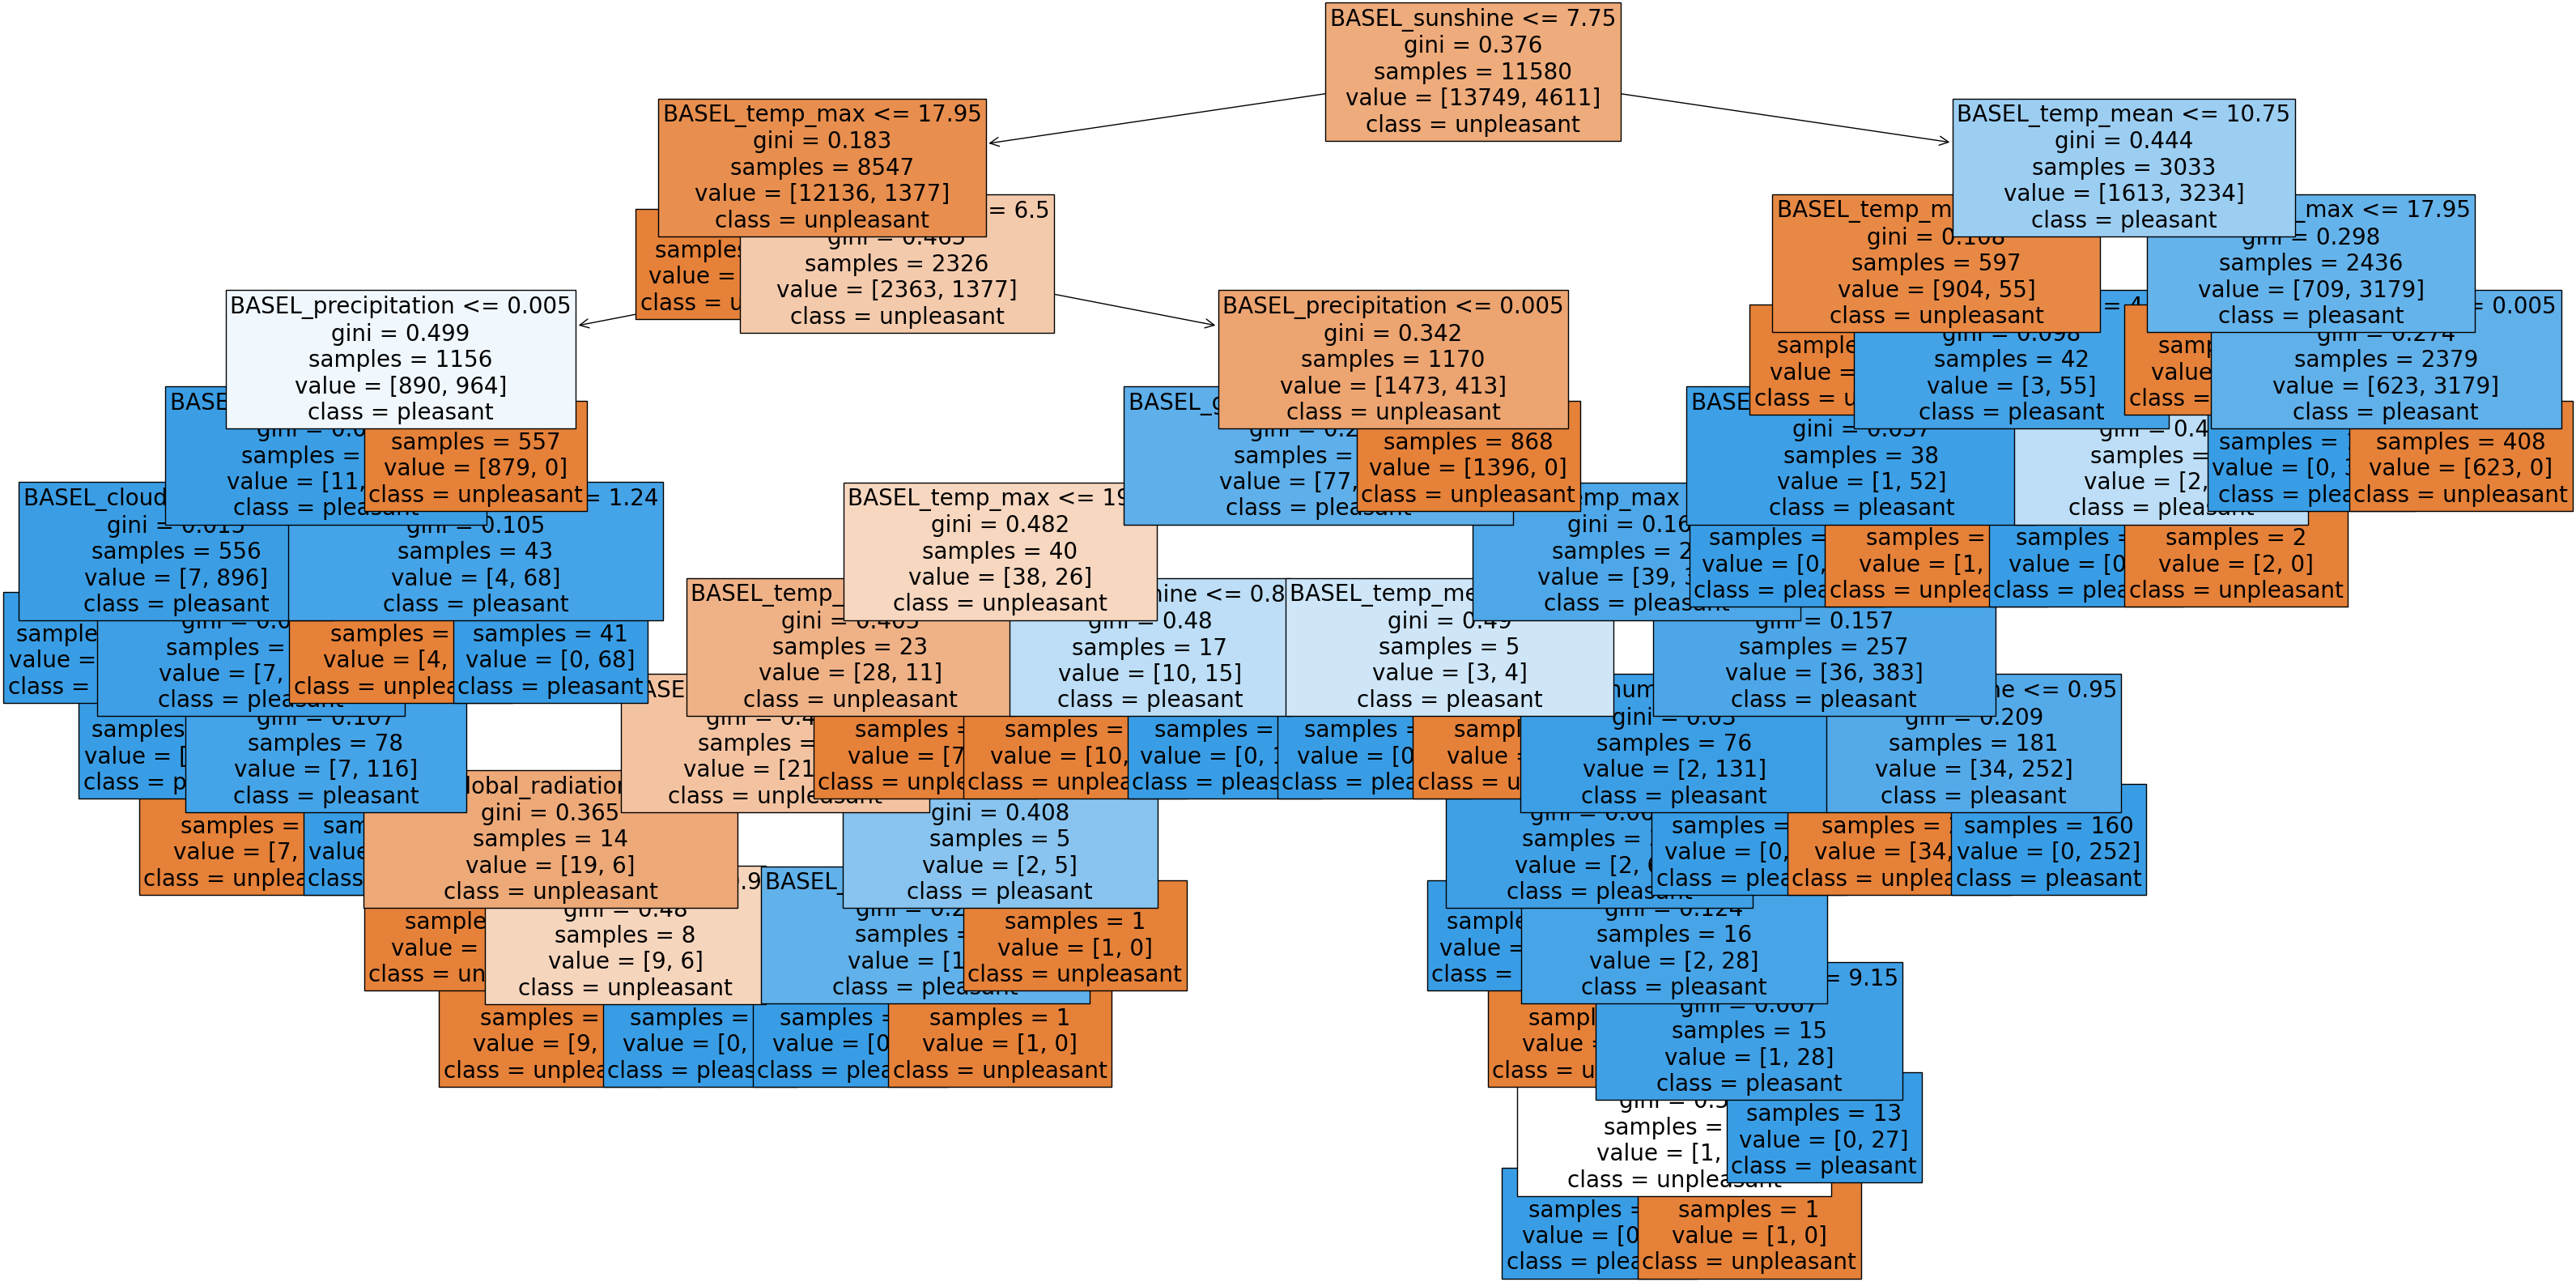

In [37]:
fig_1 = plt.figure(figsize=(40,20))
plot_tree(clf_1.estimators_[5], fontsize = 20, feature_names=df_1.columns, class_names=['unpleasant', 'pleasant'],  filled=True);

In [38]:
# Create a path
path_viz="C:/Users/Oksana Stepanova/OneDrive/Документи/ClimateWins/Unsupervised/04 Analysis/Visualizations"

In [40]:
# Export the plot
fig_1.savefig(f"{path_viz}/decision_tree_BASEL.png")

In [41]:
# Retrieve feature importances from the trained model
feature_importances_1 = clf_1.feature_importances_
print("Feature Importances BASEL:", feature_importances_1)
print(feature_importances_1.shape)

Feature Importances BASEL: [0.02919261 0.00969348 0.00898533 0.10060225 0.36386918 0.10468406
 0.07764996 0.01864613 0.286677  ]
(9,)


In [43]:
indicators=[
    "cloud cover",
    "humidity",
    "pressure",
    "global radiation",
    "precipitation",
    "sunshine",
    "temp mean",
    "temp min",
    "temp max"
]

In [44]:
# Create a dataframe to associate observation measurements with their importances
importances_df_1 = pd.DataFrame({
    'Indicators': indicators,
    'Importance': feature_importances_1
})

In [45]:
# Sort by importance for chart readability
importances_df_1= importances_df_1.sort_values(by='Importance', ascending=False)
print("Feature Importance BASEL:")
print(importances_df_1)

Feature Importance BASEL:
         Indicators  Importance
4     precipitation    0.363869
8          temp max    0.286677
5          sunshine    0.104684
3  global radiation    0.100602
6         temp mean    0.077650
0       cloud cover    0.029193
7          temp min    0.018646
1          humidity    0.009693
2          pressure    0.008985


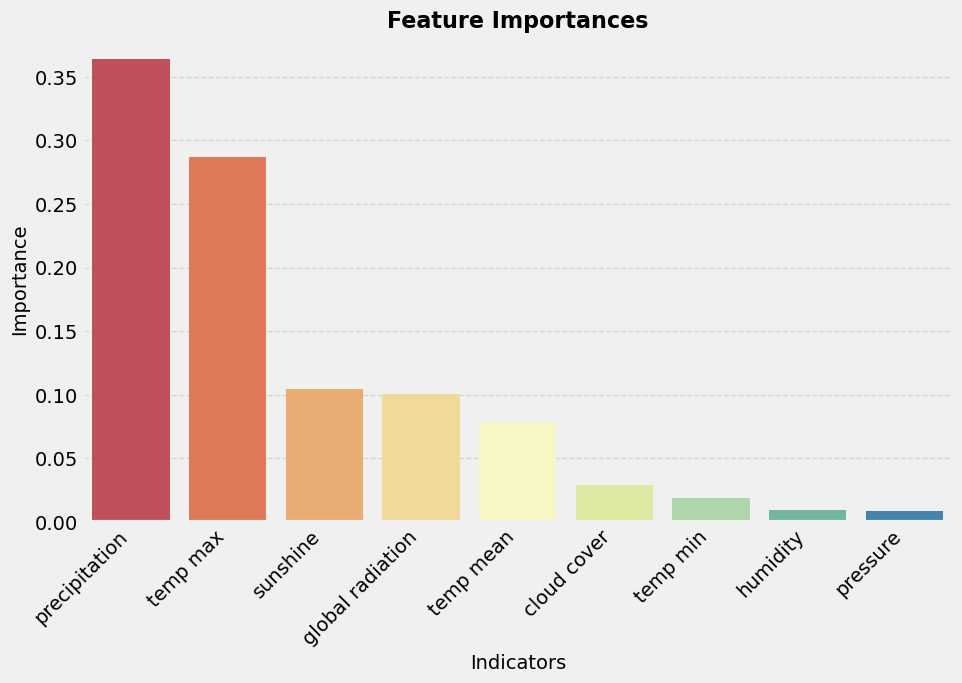

In [58]:
# Create a figure and axis object
fig_1, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(ax=ax, x=importances_df_1['Indicators'], y=importances_df_1['Importance'], palette='Spectral')

# Add titles and labels
ax.set_title('Feature Importances', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicators', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)

# Rotate x labels if they are too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid for better visualization
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [59]:
# Export the plot
fig_1.savefig(f"{path_viz}/Weather_indicators_BASEL.png")

### 2.2. Applying Random Forest Classifier for BELGRAGE data

#### Creating subset

In [61]:
# Create a pattern 
pattern_belgrade=r'(BELGRADE)'

# Filter the columns
columns_belgrade=df.filter(regex=pattern_belgrade).columns

In [62]:
columns_belgrade.shape

(9,)

In [63]:
columns_belgrade

Index(['BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure',
       'BELGRADE_global_radiation', 'BELGRADE_precipitation',
       'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min',
       'BELGRADE_temp_max'],
      dtype='object')

In [65]:
df_2=df[columns_belgrade]

In [66]:
df_2.shape

(22950, 9)

In [68]:
df_2.head(1)

,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max
0,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9


In [69]:
df_ans_2=df_ans[['BELGRADE_pleasant_weather']]

In [70]:
df_ans_2.shape

(22950, 1)

In [71]:
df_ans_2.head(1)

,BELGRADE_pleasant_weather
0,0


#### Splitting data

In [73]:
# Create an 'X' matrix
X_2 = df_2.to_numpy()
y_2 = df_ans_2.max(axis=1)

In [74]:
print(X_2.shape)
print(y_2.shape)

(22950, 9)
(22950,)


In [75]:
#Split data into training and testing sets.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.2)

In [76]:
print(X_train_2.shape, y_train_2.shape)
print(X_test_2.shape, y_test_2.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


#### Applying Random Forest Classifier 

In [78]:
# Create a RF classifier
clf_2 = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier()

In [79]:
# performing predictions on the test dataset
y_pred_2 = clf_2.predict(X_test_2)
  
# using metrics module for accuracy calculation
print("Model Accuracy BELGRADE: ", metrics.accuracy_score(y_test_2, y_pred_2))

Model Accuracy BELGRADE:  1.0


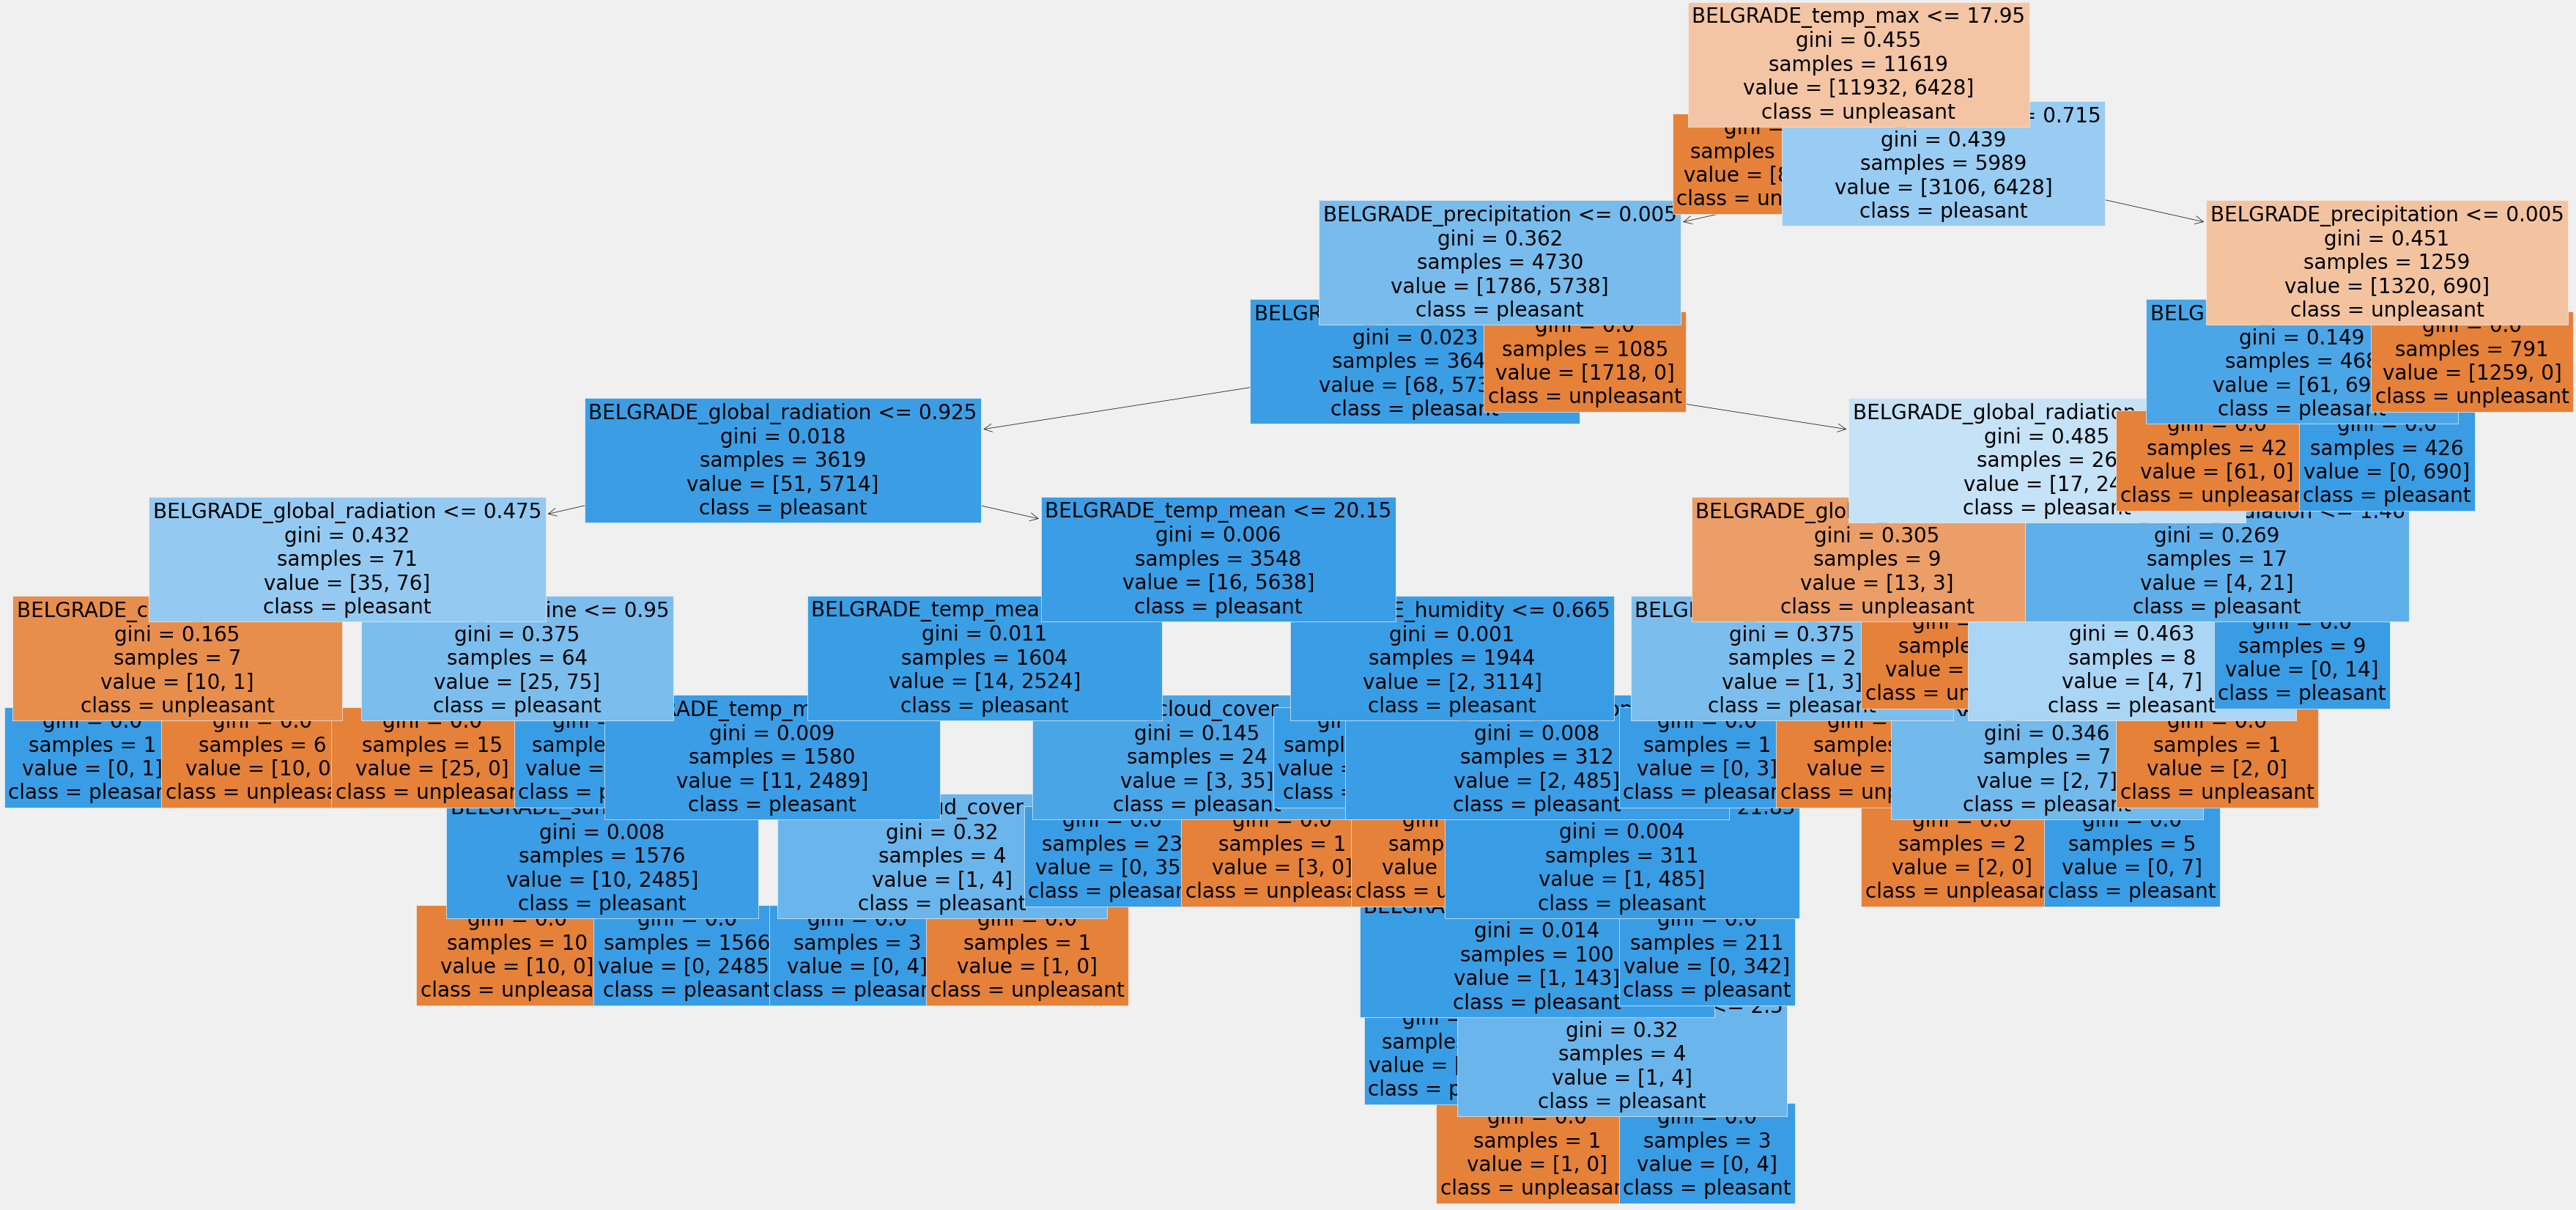

In [80]:
fig_2 = plt.figure(figsize=(40,20))
plot_tree(clf_2.estimators_[5], fontsize = 20, feature_names=df_2.columns, class_names=['unpleasant', 'pleasant'],  filled=True);

In [81]:
# Export the plot
fig_2.savefig(f"{path_viz}/decision_tree_BELGRADE.png")

In [82]:
# Retrieve feature importances from the trained model
feature_importances_2 = clf_2.feature_importances_
print("Feature Importances BELGRADE:", feature_importances_2)
print(feature_importances_2.shape)

Feature Importances BELGRADE: [0.03914408 0.01040113 0.01015161 0.0615823  0.35859031 0.08132321
 0.12520332 0.04039277 0.27321128]
(9,)


In [83]:
# Create a dataframe to associate observation measurements with their importances
importances_df_2 = pd.DataFrame({
    'Indicators': indicators,
    'Importance': feature_importances_2
})

In [84]:
# Sort by importance for chart readability
importances_df_2= importances_df_2.sort_values(by='Importance', ascending=False)
print("Feature Importance BELGRADE:")
print(importances_df_2)

Feature Importance BELGRADE:
         Indicators  Importance
4     precipitation    0.358590
8          temp max    0.273211
6         temp mean    0.125203
5          sunshine    0.081323
3  global radiation    0.061582
7          temp min    0.040393
0       cloud cover    0.039144
1          humidity    0.010401
2          pressure    0.010152


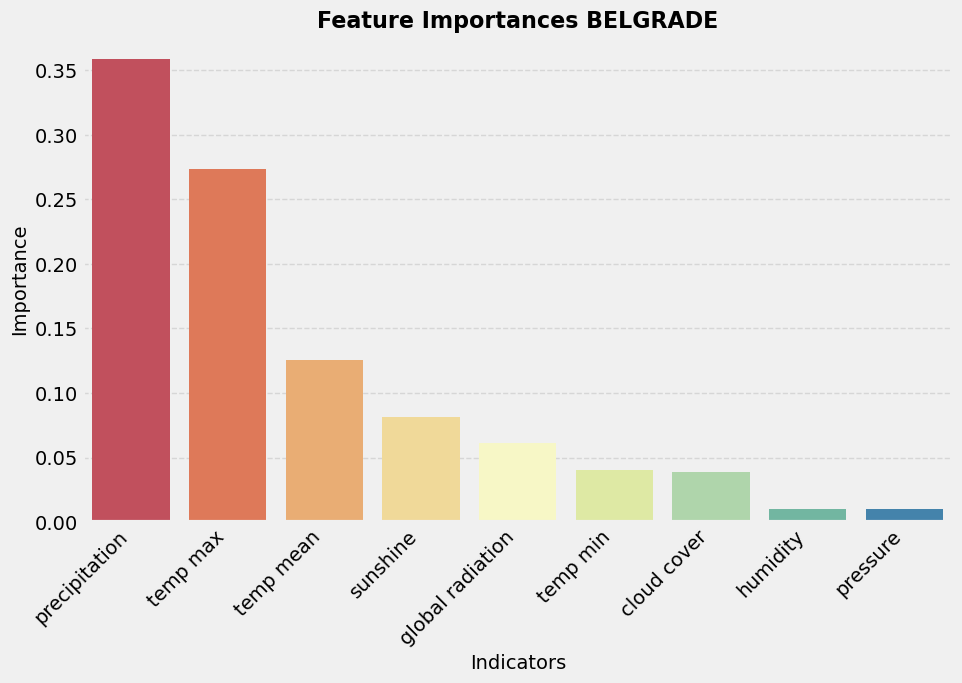

In [86]:
# Create a figure and axis object
fig_2, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(ax=ax, x=importances_df_2['Indicators'], y=importances_df_2['Importance'], palette='Spectral')

# Add titles and labels
ax.set_title('Feature Importances BELGRADE', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicators', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)

# Rotate x labels if they are too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid for better visualization
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [87]:
# Export the plot
fig_2.savefig(f"{path_viz}/Weather_indicators_BELGRADE.png")

### 2.3. Applying Random Forest Classifier for MADRID data

#### Creating subset

In [90]:
# Create a pattern 
pattern_madrid=r'(MADRID)'

# Filter the columns
columns_madrid=df.filter(regex=pattern_madrid).columns

In [91]:
columns_madrid.shape

(9,)

In [92]:
columns_madrid

Index(['MADRID_cloud_cover', 'MADRID_humidity', 'MADRID_pressure',
       'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine',
       'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max'],
      dtype='object')

In [93]:
df_3=df[columns_madrid]

In [94]:
df_3.shape

(22950, 9)

In [95]:
df_3.head(1)

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8


In [96]:
df_ans_3=df_ans[['MADRID_pleasant_weather']]

In [97]:
df_ans_3.shape

(22950, 1)

In [98]:
df_ans_3.head(1)

,MADRID_pleasant_weather
0,0


In [99]:
# Create an 'X' matrix
X_3 = df_3.to_numpy()
y_3 = df_ans_3.max(axis=1)

In [100]:
print(X_3.shape)
print(y_3.shape)

(22950, 9)
(22950,)


In [101]:
#Split data into training and testing sets.
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,y_3,test_size=0.2)

In [102]:
print(X_train_3.shape, y_train_3.shape)
print(X_test_3.shape, y_test_3.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


#### Applying Random Forest Classifier 

In [104]:
# Create a RF classifier
clf_3 = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier()

In [105]:
# performing predictions on the test dataset
y_pred_3 = clf_3.predict(X_test_3)
  
# using metrics module for accuracy calculation
print("Model Accuracy MADRID: ", metrics.accuracy_score(y_test_3, y_pred_3))

Model Accuracy MADRID:  1.0


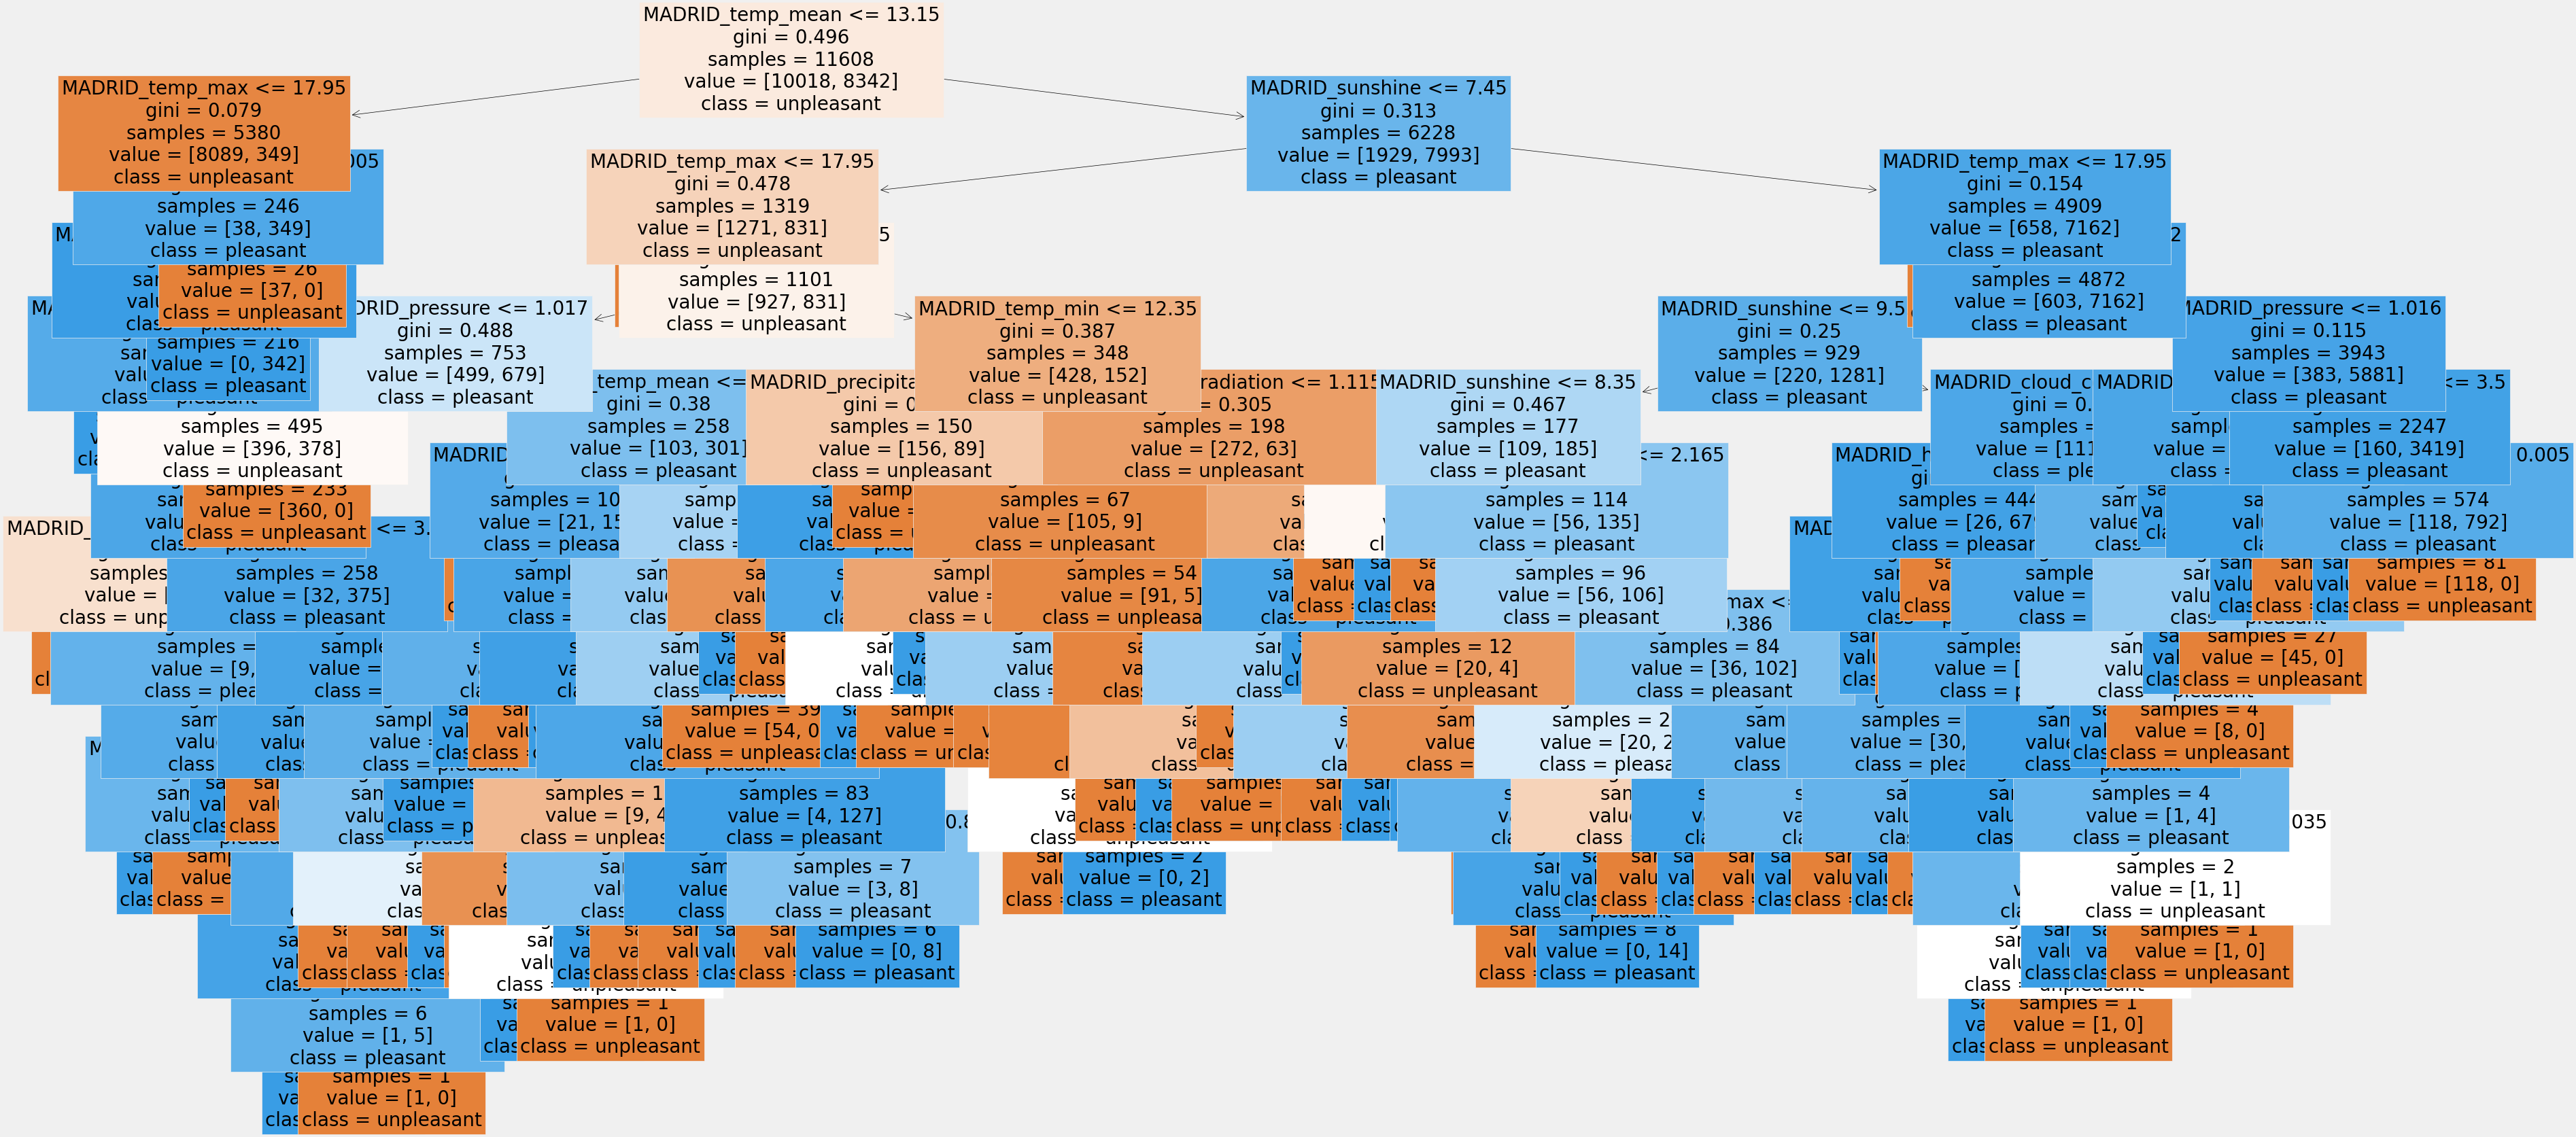

In [106]:
fig_3 = plt.figure(figsize=(40,20))
plot_tree(clf_3.estimators_[5], fontsize = 20, feature_names=df_3.columns, class_names=['unpleasant', 'pleasant'],  filled=True);

In [107]:
# Export the plot
fig_3.savefig(f"{path_viz}/decision_tree_MADRID.png")

In [108]:
# Retrieve feature importances from the trained model
feature_importances_3 = clf_3.feature_importances_
print("Feature Importances MADRID:", feature_importances_3)
print(feature_importances_3.shape)

Feature Importances MADRID: [0.01947768 0.02583388 0.00403148 0.06877834 0.21644605 0.08514516
 0.16952414 0.08291547 0.32784781]
(9,)


In [109]:
# Create a dataframe to associate observation measurements with their importances
importances_df_3 = pd.DataFrame({
    'Indicators': indicators,
    'Importance': feature_importances_3
})

In [110]:
# Sort by importance for chart readability
importances_df_3= importances_df_3.sort_values(by='Importance', ascending=False)
print("Feature Importance MADRID:")
print(importances_df_3)

Feature Importance MADRID:
         Indicators  Importance
8          temp max    0.327848
4     precipitation    0.216446
6         temp mean    0.169524
5          sunshine    0.085145
7          temp min    0.082915
3  global radiation    0.068778
1          humidity    0.025834
0       cloud cover    0.019478
2          pressure    0.004031


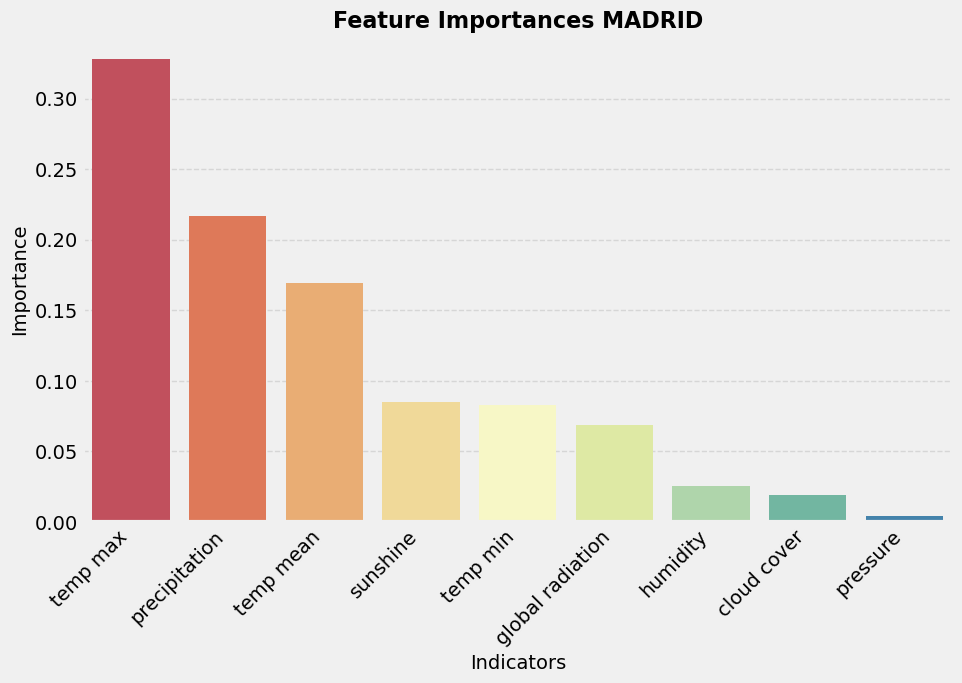

In [111]:
# Create a figure and axis object
fig_3, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
sns.barplot(ax=ax, x=importances_df_3['Indicators'], y=importances_df_3['Importance'], palette='Spectral')

# Add titles and labels
ax.set_title('Feature Importances MADRID', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicators', fontsize=14)
ax.set_ylabel('Importance', fontsize=14)

# Rotate x labels if they are too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add grid for better visualization
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [112]:
# Export the plot
fig_3.savefig(f"{path_viz}/Weather_indicators_MADRID.png")